In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv
/kaggle/input/covid19-symptoms-checker/Raw-Data.csv


In [2]:
df = pd.read_csv("../input/covid19-symptoms-checker/Cleaned-Data.csv")

df.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
#Show data desccription
display(df.describe())


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:

#show data shape
display(df.shape)


(316800, 27)

In [6]:
# sum of null data based on attributes. 
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [11]:
data = df
#To remove the columns of the DataFrame in memory.
data.drop(["Country"],axis=1,inplace=True)

In [12]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# # Drop irrelevant attributes
# for i in df.columns[11:]:
#   print(i)
#   df = df.drop(i, axis=1)

# # Create a new dataframe
# basket = df.copy()

# # Show the the tope 5 obersrvation of the dataset
# display(basket.head(5))

## EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fever', ylabel='count'>

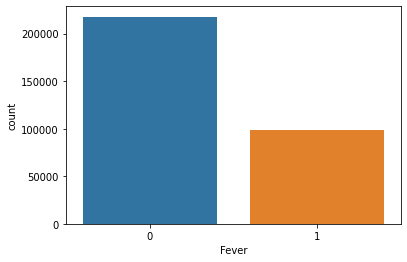

In [7]:

sns.countplot(df["Fever"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Tiredness', ylabel='count'>

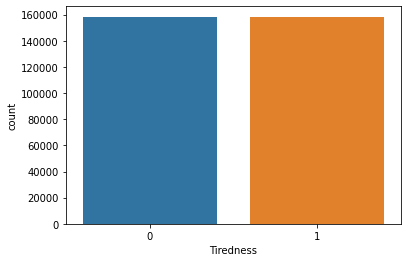

In [8]:
sns.countplot(df["Tiredness"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dry-Cough', ylabel='count'>

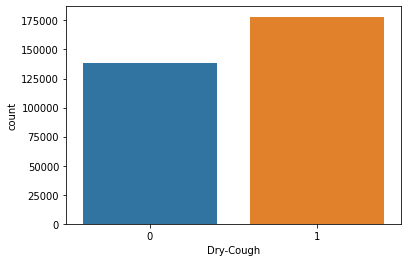

In [9]:
sns.countplot(df["Dry-Cough"])

In [13]:
from sklearn.preprocessing import StandardScaler , Normalizer


In [16]:
#To scale the values along columns.
scaler= StandardScaler()
data_scaled =scaler.fit_transform(data)

In [18]:
from sklearn.cluster import KMeans

In [19]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(data_scaled)
    scores.append(corona_means.inertia_)

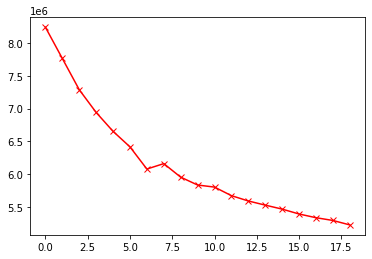

In [20]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

At point 7 ,the graph looks like a elbow. So we choose this as our K value.

In [21]:
#Applying K-means algorithm with the obtained K value.
corona_means=KMeans(n_clusters=7)
corona_means.fit(data_scaled)

KMeans(n_clusters=7)

In [22]:
#Returns an array with cluster labels to which it belongs.
labels=corona_means.labels_

In [23]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)
data2 =pd.DataFrame(corona_means.cluster_centers_,columns=data.columns)
data2

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.991697e-16,-9.335640e-15,-1.079605e-14,1.732051e+00,-5.773503e-01,-5.773503e-01,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.689059e-16,-9.406168e-15,-1.077710e-14,-5.773503e-01,-5.773503e-01,1.732051e+00,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.995299e-17,1.083983e-14,1.083748e-14,-5.144594e-20,-1.714865e-20,-7.398057e-17,-1.714865e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.789061e-16,-9.375641e-15,-1.079605e-14,-5.773503e-01,-5.773503e-01,-5.773503e-01,1.732051e+00,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,...,2.282373e-15,-3.364845e-16,-5.516032e-16,-1.007892e-19,-3.359640e-20,-7.394768e-17,-3.359640e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.891695e-16,-9.345114e-15,-1.077710e-14,-5.773503e-01,1.732051e+00,-5.773503e-01,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
6,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.304126e-16,-3.218960e-16,4.300096e-16,5.369232e-17,...,1.329361e-15,-2.159075e-16,2.135820e-16,-1.366752e-19,-4.555839e-20,-7.392375e-17,-4.555839e-20,7.401487e-17,7.401487e-17,7.401487e-17


It's clear from the above table that the people at cluster 4 are not affected with corona while other clusters do affected with corona. The other clusters can also be classified. Have a close look you can find difference between the clusters.

In [28]:
#Concatenating the cluster labels.
corona_cluster=pd.concat([data,pd.DataFrame({"Cluster":labels})],axis=1)

corona_cluster.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,5
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,5
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,5
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,3
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,3
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,3
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,1


## Principal Component Analysis (PCA)
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [30]:
from sklearn.decomposition import PCA

In [31]:
#Implementing pca with 2 components i.e 2d plot
data_pca =PCA(n_components=2)
principal_comp = data_pca.fit_transform(data_scaled)

In [32]:
principal_comp = pd.DataFrame(principal_comp,columns=['pca1','pca2'])
principal_comp.head()

,pca1,pca2
0,-2.099783,-1.842788
1,-2.105396,-1.764449
2,-2.104786,-1.785246
3,-2.065856,-1.829905
4,-2.071470,-1.751565


In [33]:
principal_comp = pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp.head(10)

,pca1,pca2,Cluster
0,-2.099783,-1.842788,0
1,-2.105396,-1.764449,0
2,-2.104786,-1.785246,0
3,-2.065856,-1.829905,5
4,-2.071470,-1.751565,5
5,-2.070860,-1.772362,5
6,-2.088301,-1.878004,3
7,-2.093915,-1.799665,3
8,-2.093304,-1.820461,3
9,-2.088037,-1.835243,1


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


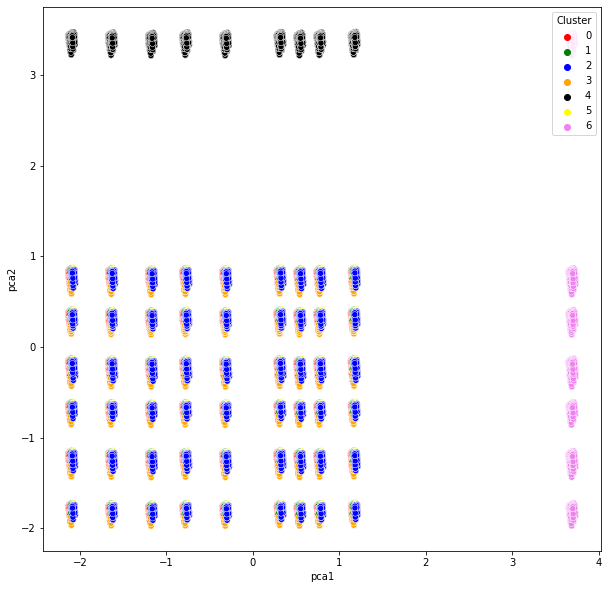

In [34]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

In [36]:
#Implementing pca with 3 components i.e 3d plot

data_pca_3d =PCA(n_components=3)
principal_comp_3d =data_pca_3d.fit_transform(data_scaled)


In [37]:

principal_comp_3d =pd.DataFrame(principal_comp_3d,columns=['pca1','pca2','pca3'])
principal_comp_3d.head()

,pca1,pca2,pca3
0,-1.988055,-2.146143,0.455879
1,-1.970783,-2.140076,0.540336
2,-2.186596,-2.285971,0.463066
3,-2.039354,-2.159437,0.350036
4,-2.022082,-2.153370,0.434493


In [38]:
principal_comp_3d =pd.concat([principal_comp_3d,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp_3d.head(5)

,pca1,pca2,pca3,Cluster
0,-1.988055,-2.146143,0.455879,0
1,-1.970783,-2.140076,0.540336,0
2,-2.186596,-2.285971,0.463066,0
3,-2.039354,-2.159437,0.350036,5
4,-2.022082,-2.153370,0.434493,5


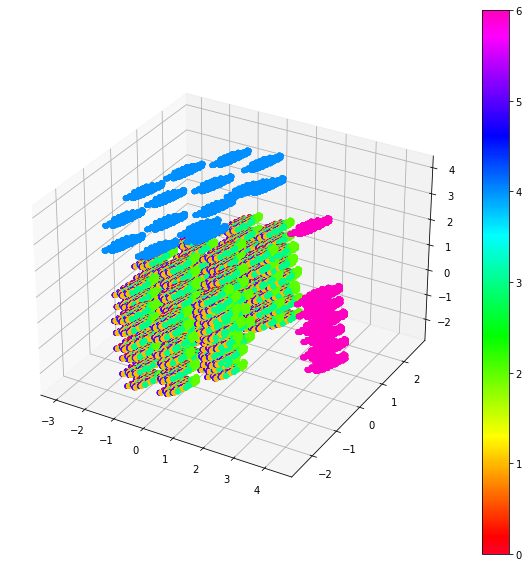

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp_3d['pca1'],ys=principal_comp_3d['pca3'],zs=principal_comp_3d['pca2'],c=principal_comp_3d['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()